# Breast Cancer Wisconsin Diagnostic Prediction
**Benign or Malignant Cancer Tumors**

### Classification Models after Principal component analysis

#### **Developed by** [**Parth Maniar** ](https://github.com/officialpm)  🖖

<img src="https://visitor-badge.laobi.icu/badge?page_id=officialpm.BreastCancerModelsPCA" alt="visitor badge"/>
<div>

<a href="mailto:officialparthmaniar@gmail.com">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/gmail.svg" />
</a>

<a href="https://twitter.com/parthcodes">
  <img align="left" alt="Parth | Twitter" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/parthdmaniar/">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/parthmaniar">
  <img align="left" alt="Parth's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>


</div>
<br/>

---


# Downloading dataset from UCI
---
Dataset Link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2020-11-11 14:07:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   789KB/s    in 0.2s    

2020-11-11 14:07:16 (789 KB/s) - ‘wdbc.data’ saved [124103/124103]



In [2]:
import pandas as pd

In [3]:
headers = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
data = pd.read_csv('wdbc.data', names=headers)

# Classification Models

## Importing Packages

In [4]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# !pip install tqdm
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

## Preparing Data

In [5]:
# feature names as a list
col = data.columns  # .columns gives columns names in data 
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# Y includes our labels and x includes our features
Y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
X = data.drop(list,axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Function is used to convert text class to neumerical class
def Y_class(Y):
  if Y == 'B':
    return 0
  elif Y == 'M':
    return 1

#changing 
actual_value = Y
category = actual_value.map(Y_class) 
Y_class = category
drop_list = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','radius_se']
x = X.drop(drop_list,axis = 1 )

In [8]:
from sklearn.preprocessing import StandardScaler
X_std_model = StandardScaler()
X_std = X_std_model.fit(X)
X_std = X_std_model.transform(X)

import pickle
pickle_out = open("X-STANDARD-MODEL.pickle","wb")
pickle.dump(X_std_model, pickle_out)
pickle_out.close()

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
from numpy.linalg import eig
values, vectors = eig(cov_mat)
eigen_pair = sorted([(np.abs(values[i]), vectors[:,i]) for i in range(len(values))], key = lambda x: x[0], reverse = True)

var_exp = [(i / sum(values))*100 for i in sorted(values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
matrix = []
for values in eigen_pair[:15]:
  matrix.append(values[1])
X_pca = np.array(matrix).transpose()

pickle_out = open('X-PCA.pickle','wb')
pickle.dump(X_pca, pickle_out)
pickle_out.close()

X_re = X_std.dot(X_pca)

from sklearn.model_selection import train_test_split
X_t_re, X_test_re, Y_t_re, Y_test_re = train_test_split(X_re, Y_class, test_size=0.05, random_state=42)
X_train_re, X_val_re, Y_train_re, Y_val_re = train_test_split(X_t_re, Y_t_re, test_size=0.05, random_state=42)

## Applying Models

### Logistic Regression


In [9]:
C_list = []
i = 0.0001
for count in range(25):
    C_list.append(i)
    i = round(i+0.001,4)

In [10]:
def AUC_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for C in C_list:
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
        clf = LogisticRegression(C=C,penalty="l2")
        clf.fit(X_train, Y_train)
                # predict the response
        probs_train = clf.predict_proba(X_train)
        preds_train = probs_train[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
        probs_cv = clf.predict_proba(X_cv)
        preds_cv = probs_cv[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, preds_cv)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
    
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

**Learning Curve**

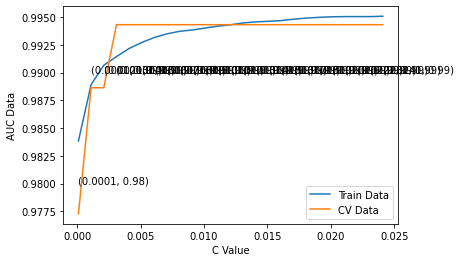

,Train_Accuracy,CV_Accuracy
0.0001,0.983836,0.977273
0.0011,0.988920,0.988636
0.0021,0.990663,0.988636
0.0031,0.991445,0.994318
0.0041,0.992179,0.994318
0.0051,0.992716,0.994318
0.0061,0.993173,0.994318
0.0071,0.993498,0.994318
0.0081,0.993727,0.994318
0.0091,0.993841,0.994318


In [11]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train_re, Y_train_re, X_val_re, Y_val_re)

In [12]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = LogisticRegression(C=C,penalty="l2")
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

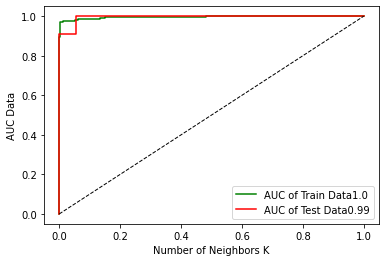

In [13]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0241,X_train_re, Y_train_re, X_test_re, Y_test_re)

In [14]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[322   1]
 [ 13 177]]
Normalized confusion matrix
[[1.   0.  ]
 [0.07 0.93]]


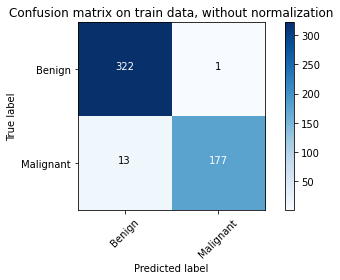

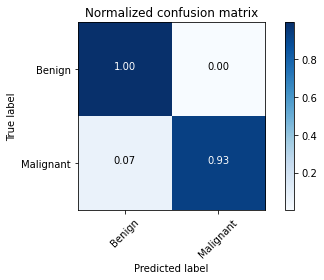

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_re, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


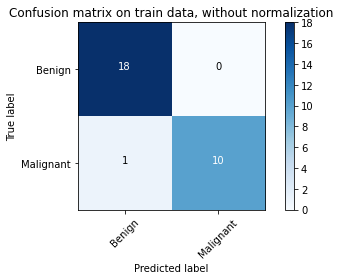

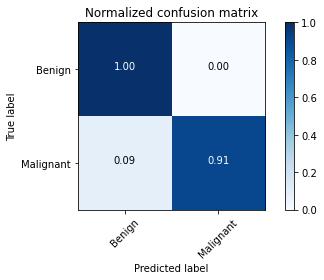

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_re, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [17]:
# This function will give top 10 positive class feature which has hightest probability from BOW data with l1 regularizer
def most_informative_feature_for_class(data, classifier):
    topn = sorted(zip(classifier.coef_[0], [i for i in range(data.shape[1])] ), reverse=True)
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

In [18]:
X_re.shape

(569, 15)

Most Important Feature for class Logistic Regression : 


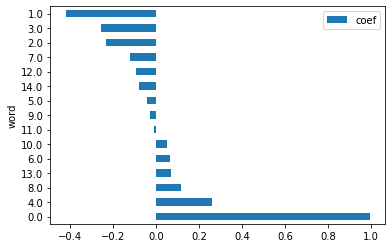

In [19]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(X_re,clf)
ax = df.plot.barh(x='word', y='coef')

In [20]:
clf.coef_

array([[ 1.  , -0.42, -0.23, -0.26,  0.26, -0.04,  0.07, -0.12,  0.12,
        -0.03,  0.05, -0.01, -0.09,  0.07, -0.08]])

**From the confusion Matrix we can see that AUC performance for Maliganant Cancer is decreased by 2, but it is not effecting our test result.**

But at the end we need to select best model, so we will not consider this model for predicting the result.

### SVM

Support vector machine is used to solve Supervised Machine Learning Problem(Classification). In support Vector Machine the algorithm will try to predict the best plane or line on the basis of support vectors of different classes.

This algorithm uses hinge loss as a loss function and l2 as regularization parameter.

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [22]:
def AUC_svm_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for alpha in C_list:
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
        clf = SGDClassifier(alpha=alpha,penalty="l2", loss="hinge")
        clf.fit(X_train, Y_train)
                # predict the response
        preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
        clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
        clf_sigmoid.fit(X_train, Y_train)
        
#       predicting probabilistic value from the Train data.
        prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
        
        
#       predicting probabilistic value from the cross validation data.
        preds_cv = clf.predict(X_cv)
        prob_cv_sigmoid = clf_sigmoid.predict_proba(X_cv)[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, prob_cv_sigmoid)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    # alpha_log = [round(log10(x),2) for x in r]
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    # Plotting the graph between alpha and its AUC value to find best alpha for our model.    
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Value of Alpha')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

**Learning Curve**

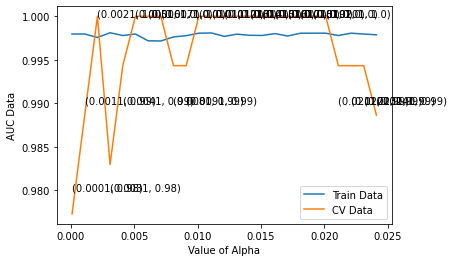

,Train_Accuracy,CV_Accuracy
0.0001,0.997955,0.977273
0.0011,0.997963,0.988636
0.0021,0.997556,1.000000
0.0031,0.998102,0.982955
0.0041,0.997784,0.994318
0.0051,0.997955,1.000000
0.0061,0.997173,1.000000
0.0071,0.997157,1.000000
0.0081,0.997621,0.994318
0.0091,0.997768,0.994318


In [23]:
# Applying logistic regression on each value of C to find best C.
AUC_svm_curve(X_train_re, Y_train_re, X_val_re, Y_val_re)

In [24]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = SGDClassifier(alpha=C,penalty="l2", loss="hinge")
    clf.fit(X_train, Y_train)
            # predict the response
    preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
    clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
    clf_sigmoid.fit(X_train, Y_train)

#       predicting probabilistic value from the Train data.
    prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
    auc_train = metrics.auc(fpr_train, tpr_train)


#       predicting probabilistic value from the cross validation data.
    preds_test = clf.predict(X_test)
    prob_test_sigmoid = clf_sigmoid.predict_proba(X_test)[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, prob_test_sigmoid)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, preds_test, preds_train

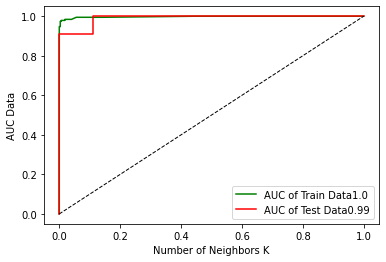

In [25]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0121,X_train_re, Y_train_re, X_test_re, Y_test_re)

Confusion matrix, without normalization
[[322   1]
 [  5 185]]
Normalized confusion matrix
[[1.   0.  ]
 [0.03 0.97]]


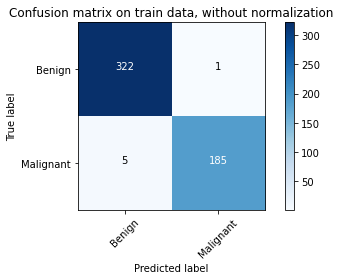

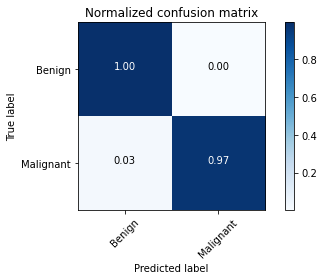

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_re, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


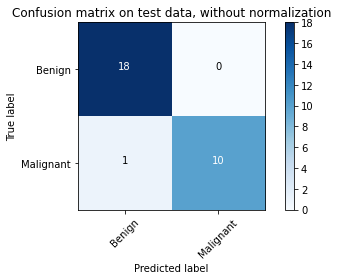

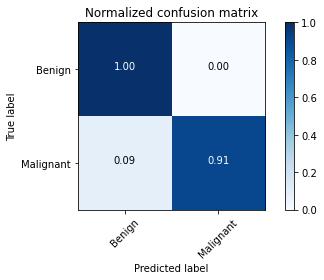

In [27]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_re, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class Logistic Regression : 


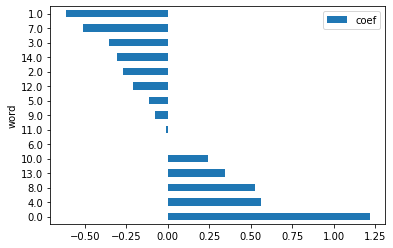

In [28]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(X_re,clf)
ax = df.plot.barh(x='word', y='coef')

In [29]:
clf.coef_

array([[ 1.22e+00, -6.17e-01, -2.68e-01, -3.53e-01,  5.60e-01, -1.13e-01,
         1.00e-03, -5.12e-01,  5.25e-01, -7.69e-02,  2.41e-01, -1.34e-02,
        -2.12e-01,  3.47e-01, -3.07e-01]])

From the confusion matrix of Training Data, we can see that SVM model has classified 322 record correct for Benign out of 323 and 185 record correct for Malignant out of 190.

At Test Time SVM Model has classified 12 record correct for Benign out of 18 and 10 record correct for Malignant out of 11.

### RandomForestClassifier

In [30]:
max_depth = [1,5,10,50,500,1000]
n_estimators = [5,10,100,500]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
def AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators):
    AUC_Train = np.zeros((len(max_depth), len(n_estimators)))
    AUC_CV = np.zeros((len(max_depth), len(n_estimators)))
    for depth in range(len(max_depth)):
        for estimators in range(len(n_estimators)):
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
            clf = RandomForestClassifier(max_depth=max_depth[depth], n_estimators=n_estimators[estimators])
            clf.fit(X_train, Y_train)
                # predict the response
            probs_train = clf.predict_proba(X_train)
            preds_train = probs_train[:,1]
            fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
#             auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
            probs_cv = clf.predict_proba(X_val)
            preds_cv = probs_cv[:,1]
            fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_val, preds_cv)
#             auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
#             print("Depth ",max_depth[depth],"Split ",min_samples_split[split], "AUC_train ",metrics.auc(fpr_train, tpr_train),
#                  "AUC_cv ",metrics.auc(fpr_cv, tpr_cv))
            
            AUC_Train[depth][estimators] = metrics.auc(fpr_train, tpr_train)
            AUC_CV[depth][estimators] = metrics.auc(fpr_cv, tpr_cv)
    return AUC_Train, AUC_CV

In [33]:
def plot_graph(AUC_train, AUC_cv):
    df_train = pd.DataFrame(AUC_train, columns = n_estimators,index = max_depth)
    df_cv = pd.DataFrame(AUC_cv, columns = n_estimators,index = max_depth)
    # plt.subplot(2, 1, 1)
    sns.heatmap(df_train, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on Train data")
    plt.show()
    # plt.subplot(2, 1, 2)
    sns.heatmap(df_cv, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on CV data")
    plt.show()
    # print(df)


In [34]:
def final_Model_rf(X_train,Y_train,X_test,Y_test,max_depth,n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

In [35]:
AUC_train, AUC_cv = AUC_curve_rf(X_train_re,Y_train_re,X_val_re, Y_val_re,max_depth,n_estimators)

**Learning Curve**

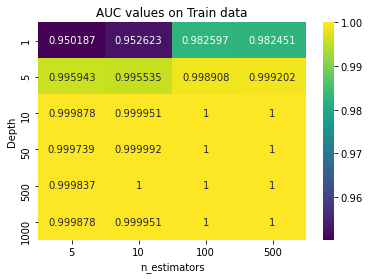

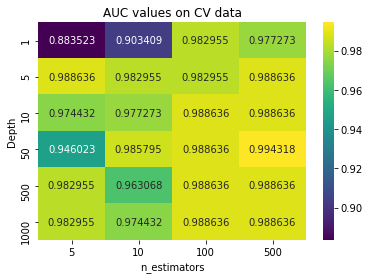

In [36]:
plot_graph(AUC_train, AUC_cv)

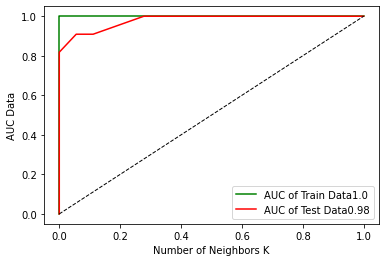

In [37]:
clf, y_pred, y_train_pred = final_Model_rf(X_train_re, Y_train_re, X_test_re, Y_test_re,50,10)

Confusion matrix, without normalization
[[323   0]
 [  0 190]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


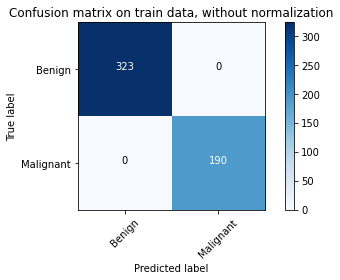

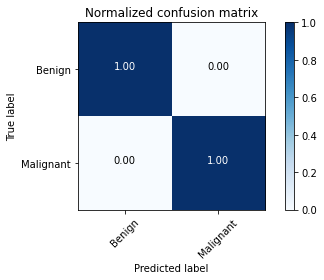

In [38]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_re, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[17  1]
 [ 1 10]]
Normalized confusion matrix
[[0.94 0.06]
 [0.09 0.91]]


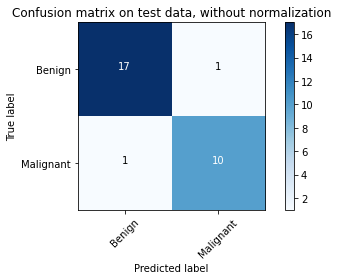

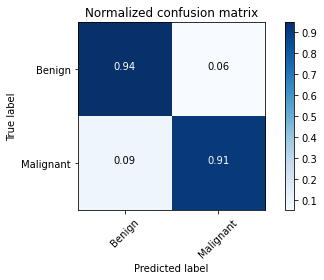

In [39]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_re, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [40]:
pickle_out = open('RandomForestClassifier_model.pickle','wb')
pickle.dump(clf, pickle_out)
pickle_out.close()

In [41]:
# most important positive class feature
def most_important_feature_rf(data, classifier):
    weight = classifier.feature_importances_
    topn = sorted(zip(weight, [i for i in range(data.shape[1])]), key = lambda x: x[0])
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

In [42]:
clf.feature_importances_

array([0.46, 0.09, 0.07, 0.03, 0.02, 0.03, 0.05, 0.02, 0.02, 0.02, 0.02,
       0.03, 0.06, 0.03, 0.03])

Most Important Feature for class Logistic Regression : 


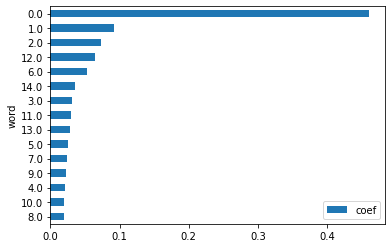

In [43]:
print("Most Important Feature for class Logistic Regression : ")
df = most_important_feature_rf(X_re,clf)
ax = df.plot.barh(x='word', y='coef')

In [44]:
import pydotplus
from PIL import Image
from sklearn.tree import export_graphviz
def decision_trees_save(clf, iteration, feature_names, target_names):
    file_name = "cancer_"+str(iteration)+"_pca.png"
    dot_data = export_graphviz(clf, out_file = None,feature_names=feature_names, class_names = target_names)
    # print(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    # print(graph)
    graph.write_png(file_name)

In [45]:
for i in range(len(clf.estimators_)):
    decision_trees_save(clf.estimators_[i], i, [i for i in range(X_re.shape[1])], ['Benign', 'Malignant'])

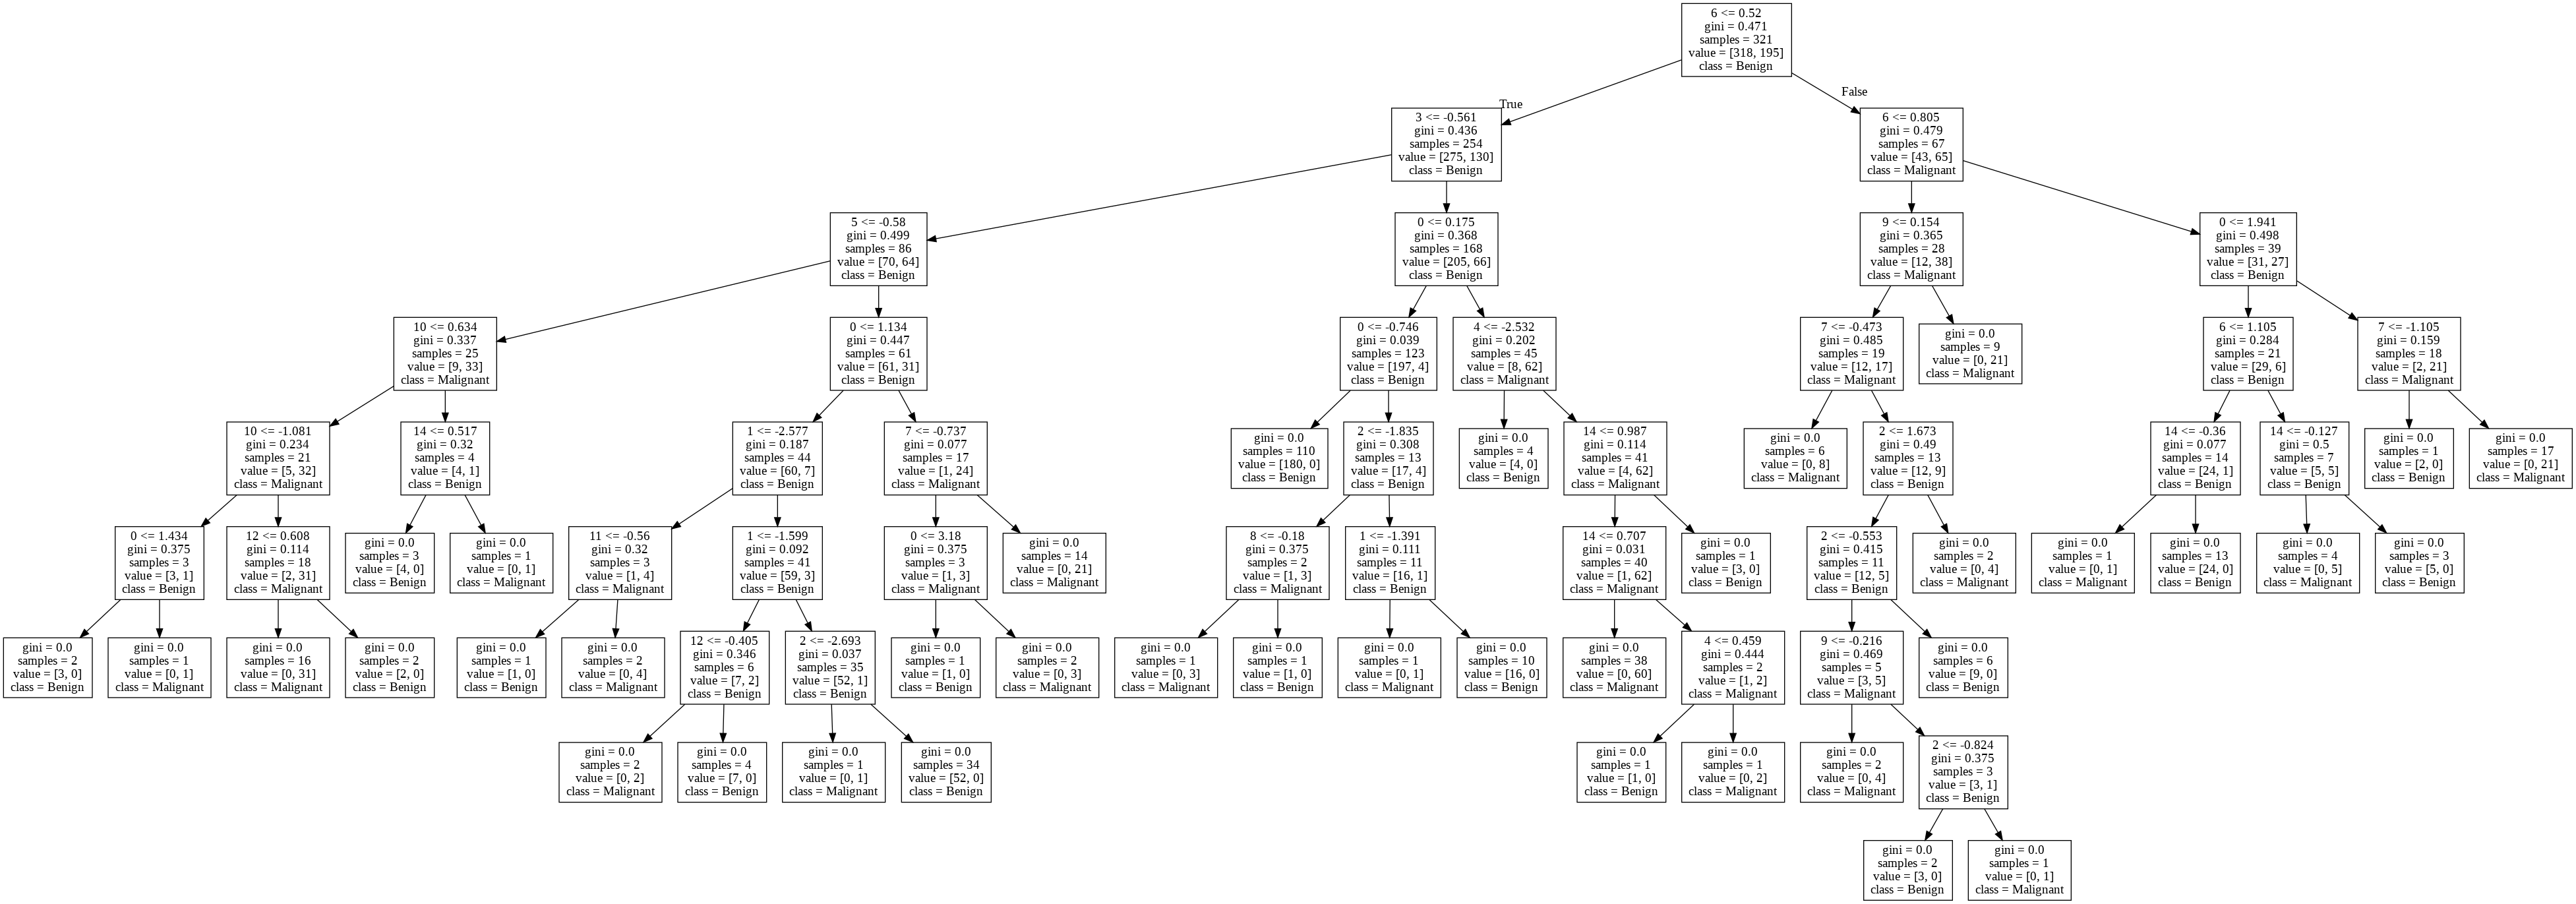

In [46]:
image = Image.open("cancer_9_pca.png")
image

# **RandomForestClassifier** is giving best result on training and test data, So we will take random forest as our base model as we can see in **confusion matrix**


**From the confusion matrix of Training Data, we can see that RF model has classified 323 record correct for Benign out of 323 and 190 record correct for Malignant out of 190.**

At Test Time RF Model has classified 17 record correct for Benign out of 18 and 10 record correct for Malignant out of 11.

----

#### PCA random forest model gives good accuracy as compare to normal random forest model this is because PCA takes only those features, which are explaining high varience, so because of that we are getting good accuracy for PCA as compare to normal models.



# Other Questions
----

**Please briefly explain how reinforcement-learning can be utilized in fraud detection
models.**

Reinforcement learning is all about making decisions sequentially. In simple words we can say that the output depends on the state of the current input and the next input depends on the output of the previous input.

**Please describe when to use logistic sigmoid, tanh, and Fourier as basis function.**


Sigmoid and tanh function is generally used in classification problem, 

**sigmoid function**: sigmoid function(f(x)=1/(1+exp(-x)) gives values between [0,1] like if we want probabilistic result from data we can use sigmoid function. Logistic regression uses sigmoid function to overcome outlier and loss effect. sigmoid function is used in generally binary classification problem, we also can use sigmoid function in Neural network but it will stuck in vanishing gradient problem.

**tanh function**: tanh function((e^z-e^(-z))/(e^z+e^(-z)) will give result between [-1,1], we can also use tanh in Neural network it is similar like sigmoid but it give output between [-1,1]. It also have problem of vanishing gradient problem in Neural Network.

**Fourier Function** : Fourier function is uses to analyze time series data. it converts time domain signal into frequency domain. The function accepts a time signal as input and produces the frequency representation of the signal as an output.

Every signal in the real world is a time signal and is made up of many different frequencies. So, time domain signal can be converted into the frequency domain to view different frequency components.